<a href="https://colab.research.google.com/github/KpihX/rocket-durability-ai/blob/main/ML_DL_NASA_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=#023F7C> **Machine Learning and Deep Learning**

---



<font color=#023F7C>**Hi! PARIS DataBootcamp 2024 🚀**</font> <br>


<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >


**Name**: KAMDEM POUOKAM Ivann Harold           <br>
**School**: Ecole polytechnique        <br>
**Group number**: 30    <br>
**Track**: Intermediate           <br>
**Teaching Assistants**: Thibault Porssut and Farouk Kadri, Machine Learning Research Engineer @ Hi! PARIS

# **1. Important guidelines**


The RUL (Remaining Useful Life) refers to the remaining lifespan of an aircraft engine before failure. In the context of the NASA C-MAPSS dataset, this term represents the number of operational cycles an engine can still perform before breaking down. **The goal of this practical session** is to build a Machine Learning model that can p**redict this value using sensor data collected during previous cycles.**

To achieve this goal, you are provided with three datasets: train_FD001.txt, test_FD001.txt, and RUL_FD001.txt, originating from the NASA C-MAPSS dataset. <br>
These datasets contain sensor measurements and operational settings for multiple aircraft engines recorded over a series of operational cycles. Each engine is run until it fails, and the sensor data capture the degradation process over time. <br>
The file RUL_FD001.txt contains the actual Remaining Useful Life (RUL) values for the engines in the test set at the point where the test data end.

The variable to predict is RUL, which represents the number of operational cycles remaining before the engine fails.

**<font size='5'><u>How to work on this notebook</u>**</font> <br>
The notebook is split in two parts: Machine Learning and Deep Learning.

- **Beginner track**: You only have to complete the Machine Learning and Deeep Learning section.
- **Intermediate track**: Please complete Machine Learning, Deep Learning and the optional section.

**<font size='5'><u>Bootcamp deliverables</u>**</font> <br>

Here are the two deadlines for the bootcamp deliverables:
- <u>**Friday 12:30 PM**</u>: <br> Send us the "Machine Learning and Deep Learning" notebooks (no need to send us data cleaning) <br>
    - **Each group member should send his own notebooks** (we won't accept one notebook per group)
    - Don't forget to complete the start of the notebook with your information (name, school, group number and track)
    
- <u>**Friday 2:30PM**</u>: <br>Send us the group slides <br>
    - You can send us a single powerpoint per group (no need to send us one per group member)
    - Don't forget to add your group number as well as who is in your group (name, school and track) to the slides

Send both the notebooks and the slides at `data-event@hi-paris.fr`

**<font size='5'><u>Need help ? 🙏</u>**</font> <br>

We will drop later in the week to the Machine Learning course (Beginner track) on HFactory the `Machine_Learning_Beginner_DB2025.ipynb` notebook for those who need help with the Machine Learning part.

**Don't hesitate to ask questions to the bootcamp organizers/staff members if you need help.**


# **2. Machine Learning**

Let's start by importing the libraries needed for this notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
import os
# For files importation throught my google drive - To be changed
from google.colab import drive

drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Hi_AI_2025/Project/ML")
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['02_df_test_FD001_wo_nan_denoised.csv',
 '02_df_train_FD001_wo_nan_denoised.csv',
 'ML_DL_NASA_2025.ipynb']

Now load the train and test datasets using `pd.read_csv()`

In [ ]:
train_path =  '02_df_train_FD001_wo_nan_denoised.csv'
test_path = '02_df_test_FD001_wo_nan_denoised.csv'

# Train and test data.
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

train_df

Train shape: (18816, 28)
Test shape: (12039, 28)


,engine_unit_number,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (°C),LPC outlet temperature (°C),HPC outlet temperature (°C),LPT outlet temperature (°C),Fan inlet pressure (bar),...,Corrected core speed (rpm),Bypass ratio (dimensionless),"Burner fuel-air ratio (mass ratio, dimensionless)",Bleed enthalpy (kJ/kg),Demanded fan speed (rpm),Demanded corrected fan speed (rpm),HPT coolant bleed flow (kg/s),LPT coolant bleed flow (kg/s),RUL,RUL_class
0,1,1,-0.0007,-0.0004,100.0,15.0,83.416667,610.016667,504.961111,1.008014,...,8138.62,8.4195,0.03,392.0,2388,100.0,17.717318,10.622680,191,0
1,1,2,0.0019,-0.0003,100.0,15.0,83.600000,611.194444,506.372222,1.008014,...,8131.49,8.4318,0.03,392.0,2388,100.0,17.690102,10.624766,190,0
2,1,3,-0.0043,0.0003,100.0,15.0,83.711111,609.066667,506.961111,1.008014,...,8133.23,8.4178,0.03,390.0,2388,100.0,17.667423,10.588751,189,0
3,1,4,0.0007,0.0000,100.0,15.0,83.711111,606.177778,505.666667,1.008014,...,8133.83,8.3682,0.03,392.0,2388,100.0,17.635671,10.602223,188,0
4,1,5,-0.0019,-0.0002,100.0,15.0,83.722222,610.467202,508.083333,1.008014,...,8133.80,8.4294,0.03,393.0,2388,100.0,17.644743,10.616057,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18811,100,189,0.0015,0.0001,100.0,15.0,84.455556,615.655556,517.488889,1.008014,...,8139.78,8.4870,0.03,397.0,2388,100.0,17.531345,10.459432,11,1
18812,100,190,-0.0001,0.0002,100.0,15.0,84.138889,612.655556,519.094444,1.008014,...,8142.28,8.5162,0.03,395.0,2388,100.0,17.427019,10.459976,10,1
18813,100,192,-0.0009,0.0001,100.0,15.0,84.366667,610.467202,515.450000,1.008014,...,8143.46,8.4892,0.03,397.0,2388,100.0,17.490522,10.467551,8,1
18814,100,193,-0.0001,0.0002,100.0,15.0,84.122222,615.633333,520.700000,1.008014,...,8142.02,8.5424,0.03,397.0,2388,100.0,17.449698,10.443057,7,1


### **2.1 Data preprocessing**

In [ ]:
# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [ ]:
def replace_with_gaussian_bins(df, cols):
    """
    Replace numerical columns with 7-category Gaussian bins based on mean ± n*std.

    Parameters:
    df   : DataFrame
    cols : list of column names to transform

    Returns:
    DataFrame with the same structure but selected numeric columns replaced with categorical bins
    """
    df_out = df.copy()

    labels = [
        "Extremely Low",
        "Very Low",
        "Low",
        "Normal",
        "High",
        "Very High",
        "Extremely High"
    ]

    for col in cols:
        mu = df_out[col].mean()
        sigma = df_out[col].std()

        bins = [
          -np.inf,
          mu - 2*sigma,   # Extremely Low
          mu - 1*sigma,   # Very Low
          mu - 0.5*sigma,   # Low
          mu + 0.5*sigma,   # High
          mu + 1*sigma,   # Very High
          mu + 2*sigma,   # Extremely High
          np.inf
      ]

        df_out[col] = pd.cut(df_out[col], bins=bins, labels=labels, include_lowest=True)

    return df_out

In [ ]:
train_df=replace_with_gaussian_bins(train_df,["HPC outlet temperature (°C)"])
test_df=replace_with_gaussian_bins(test_df,["HPC outlet temperature (°C)"])


In [ ]:


features = ['engine_unit_number',
  'time_cycles',
  'LPC outlet temperature (°C)',
  "HPC outlet temperature (°C)",
  "LPT outlet temperature (°C)",
  "HPC outlet pressure (bar)",
  "Physical core speed (rpm)",
  "Fuel flow / Ps30 (kg/s/bar)",
  "Corrected fan speed (rpm)",
  "Bypass ratio (dimensionless)",
  "Bleed enthalpy (kJ/kg)",
  "HPT coolant bleed flow (kg/s)"]



X_train = train_df[features].copy()
y_train = train_df["RUL_class"].copy()

X_test = test_df[features].copy()
y_test = test_df["RUL_class"].copy()


print("Train rows:", X_train.shape[0], "Test engines:", X_test.shape[0])

X_train

Train rows: 18816 Test engines: 12039


,engine_unit_number,time_cycles,LPC outlet temperature (°C),HPC outlet temperature (°C),LPT outlet temperature (°C),HPC outlet pressure (bar),Physical core speed (rpm),Fuel flow / Ps30 (kg/s/bar),Corrected fan speed (rpm),Bypass ratio (dimensionless),Bleed enthalpy (kJ/kg),HPT coolant bleed flow (kg/s)
0,1,1,83.416667,Normal,504.961111,38.221777,9046.19,35.967191,2388.02,8.4195,392.0,17.717318
1,1,2,83.600000,Normal,506.372222,38.179719,9044.07,36.009938,2388.07,8.4318,392.0,17.690102
2,1,3,83.711111,Normal,506.961111,38.214882,9052.94,36.019591,2388.03,8.4178,390.0,17.667423
3,1,4,83.711111,Very Low,505.666667,38.227982,9049.48,36.049928,2388.08,8.3682,392.0,17.635671
4,1,5,83.722222,Normal,508.083333,38.196955,9055.15,36.003733,2388.04,8.4294,393.0,17.644743
...,...,...,...,...,...,...,...,...,...,...,...,...
18811,100,189,84.455556,Very High,517.488889,38.032171,9069.69,35.818264,2388.24,8.4870,397.0,17.531345
18812,100,190,84.138889,High,519.094444,37.994250,9064.74,35.819643,2388.26,8.5162,395.0,17.427019
18813,100,192,84.366667,Normal,515.450000,37.999765,9060.45,35.893417,2388.21,8.4892,397.0,17.490522
18814,100,193,84.122222,Very High,520.700000,38.061818,9067.57,35.860322,2388.19,8.5424,397.0,17.449698


**<u>Question 2.1.1:</u>** <br>**Transform the categorical variables in each split with `OneHotEncoder`.** <br>


The column names OneHotEncoder creates can be accessed with `.get_feature_names_out()`. <br>
Go this [page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) for more info on how to use scikit-learn's `OneHotEncoder` function. <br>

*Don't forget, data preprocessing is only applied to the feature variables in the case of binary classification !*


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18816 entries, 0 to 18815
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   engine_unit_number             18816 non-null  int64   
 1   time_cycles                    18816 non-null  int64   
 2   LPC outlet temperature (°C)    18816 non-null  float64 
 3   HPC outlet temperature (°C)    18816 non-null  category
 4   LPT outlet temperature (°C)    18816 non-null  float64 
 5   HPC outlet pressure (bar)      18816 non-null  float64 
 6   Physical core speed (rpm)      18816 non-null  float64 
 7   Fuel flow / Ps30 (kg/s/bar)    18816 non-null  float64 
 8   Corrected fan speed (rpm)      18816 non-null  float64 
 9   Bypass ratio (dimensionless)   18816 non-null  float64 
 10  Bleed enthalpy (kJ/kg)         18816 non-null  float64 
 11  HPT coolant bleed flow (kg/s)  18816 non-null  float64 
dtypes: category(1), float64(9), int6

In [ ]:
categorical_cols = X_train.select_dtypes(include=['category']).columns
print("Categorical columns:", categorical_cols)

onehot_encoder = OneHotEncoder(sparse_output=False)

X_train_onehot = onehot_encoder.fit_transform(X_train[categorical_cols])
X_test_onehot = onehot_encoder.transform(X_test[categorical_cols])

onehot_features = onehot_encoder.get_feature_names_out()

X_train_onehot = pd.DataFrame(X_train_onehot, columns=onehot_features)
X_test_onehot = pd.DataFrame(X_test_onehot, columns=onehot_features)

X_train_onehot

Categorical columns: Index(['HPC outlet temperature (°C)'], dtype='object')


,HPC outlet temperature (°C)_Extremely High,HPC outlet temperature (°C)_Extremely Low,HPC outlet temperature (°C)_High,HPC outlet temperature (°C)_Low,HPC outlet temperature (°C)_Normal,HPC outlet temperature (°C)_Very High,HPC outlet temperature (°C)_Very Low
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
18811,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18812,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18813,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18814,0.0,0.0,0.0,0.0,0.0,1.0,0.0


However label encoding is preferred over one-hot encoding for ordinal labels because ordinal features have a meaningful, intrinsic order (e.g., Low < Medium < High). Label encoding preserves this natural ranking by mapping categories to integers that reflect their order, allowing models to interpret the progression between categories. In contrast, one-hot encoding would treat each category as unrelated, discarding the ordinal relationship and increasing the number of features unnecessarily, which can reduce efficiency without adding value.

**<u>Question 2.1.2:</u>** <br>**Transform the categorical variables with `LabelEncoder`.** <br>


The column names LabelEncoder creates can be accessed with `.get_feature_names_out()`. <br>
Go this [page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) for more info on how to use scikit-learn's `LabelEncoder` function. <br>

*Don't forget, data preprocessing is only applied to the feature variables in the case of binary classification !*

In [36]:
label_encoder = LabelEncoder()

X_train_label = label_encoder.fit_transform(X_train[categorical_cols].values.ravel())
X_test_label = label_encoder.transform(X_test[categorical_cols].values.ravel())

X_train_label = pd.DataFrame(X_train_label, columns=categorical_cols)
X_test_label = pd.DataFrame(X_test_label, columns=categorical_cols)

X_train_label

,HPC outlet temperature (°C)
0,4
1,4
2,4
3,6
4,4
...,...
18811,5
18812,2
18813,4
18814,5


In [37]:
# Display the mapping between original categories and encoded numerical values
print("Mapping of categories to numerical values:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")

Mapping of categories to numerical values:
Extremely High: 0
Extremely Low: 1
High: 2
Low: 3
Normal: 4
Very High: 5
Very Low: 6


**<u>Question 2.1.3</u>**: <br>
**Scale the continuous variables using either `StandardScaler` (standardization) or `MinMaxScaler` (normalization).**<br>





In [39]:
# Since numerical features are >= 0, we will go for MinMaxScaler
non_cat_cols = X_train.select_dtypes(exclude=['category']).columns
print("Non-categorical columns:", non_cat_cols)

norm_scaler = MinMaxScaler()

X_train_scaled = norm_scaler.fit_transform(X_train[non_cat_cols])
X_test_scaled = norm_scaler.transform(X_test[non_cat_cols])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=non_cat_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=non_cat_cols)

X_train_scaled

Non-categorical columns: Index(['engine_unit_number', 'time_cycles', 'LPC outlet temperature (°C)',
       'LPT outlet temperature (°C)', 'HPC outlet pressure (bar)',
       'Physical core speed (rpm)', 'Fuel flow / Ps30 (kg/s/bar)',
       'Corrected fan speed (rpm)', 'Bypass ratio (dimensionless)',
       'Bleed enthalpy (kJ/kg)', 'HPT coolant bleed flow (kg/s)'],
      dtype='object')


,engine_unit_number,time_cycles,LPC outlet temperature (°C),LPT outlet temperature (°C),HPC outlet pressure (bar),Physical core speed (rpm),Fuel flow / Ps30 (kg/s/bar),Corrected fan speed (rpm),Bypass ratio (dimensionless),Bleed enthalpy (kJ/kg),HPT coolant bleed flow (kg/s)
0,0.0,0.000000,0.205387,0.345184,0.706458,0.221649,0.574257,0.317073,0.403763,0.375,0.734694
1,0.0,0.002817,0.316498,0.392965,0.587084,0.200615,0.727723,0.439024,0.463097,0.375,0.673469
2,0.0,0.005634,0.383838,0.412904,0.686888,0.288620,0.762376,0.341463,0.395562,0.125,0.622449
3,0.0,0.008451,0.383838,0.369074,0.724070,0.254291,0.871287,0.463415,0.156295,0.375,0.551020
4,0.0,0.011268,0.390572,0.450903,0.636008,0.310547,0.705446,0.365854,0.451520,0.500,0.571429
...,...,...,...,...,...,...,...,...,...,...,...
18811,1.0,0.529577,0.835017,0.769375,0.168297,0.454807,0.039604,0.853659,0.729378,1.000,0.316327
18812,1.0,0.532394,0.643098,0.823740,0.060665,0.405695,0.044554,0.902439,0.870236,0.750,0.081633
18813,1.0,0.538028,0.781145,0.700339,0.076321,0.363131,0.309406,0.780488,0.739990,1.000,0.224490
18814,1.0,0.540845,0.632997,0.878104,0.252446,0.433773,0.190594,0.731707,0.996623,1.000,0.132653


In [41]:
# We end the preprocessing by combining the numerical and categorical features
X_train = pd.concat([X_train_label, X_train_scaled], axis=1)
X_test = pd.concat([X_test_label, X_test_scaled], axis=1)

X_train

,HPC outlet temperature (°C),engine_unit_number,time_cycles,LPC outlet temperature (°C),LPT outlet temperature (°C),HPC outlet pressure (bar),Physical core speed (rpm),Fuel flow / Ps30 (kg/s/bar),Corrected fan speed (rpm),Bypass ratio (dimensionless),Bleed enthalpy (kJ/kg),HPT coolant bleed flow (kg/s)
0,4,0.0,0.000000,0.205387,0.345184,0.706458,0.221649,0.574257,0.317073,0.403763,0.375,0.734694
1,4,0.0,0.002817,0.316498,0.392965,0.587084,0.200615,0.727723,0.439024,0.463097,0.375,0.673469
2,4,0.0,0.005634,0.383838,0.412904,0.686888,0.288620,0.762376,0.341463,0.395562,0.125,0.622449
3,6,0.0,0.008451,0.383838,0.369074,0.724070,0.254291,0.871287,0.463415,0.156295,0.375,0.551020
4,4,0.0,0.011268,0.390572,0.450903,0.636008,0.310547,0.705446,0.365854,0.451520,0.500,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...
18811,5,1.0,0.529577,0.835017,0.769375,0.168297,0.454807,0.039604,0.853659,0.729378,1.000,0.316327
18812,2,1.0,0.532394,0.643098,0.823740,0.060665,0.405695,0.044554,0.902439,0.870236,0.750,0.081633
18813,4,1.0,0.538028,0.781145,0.700339,0.076321,0.363131,0.309406,0.780488,0.739990,1.000,0.224490
18814,5,1.0,0.540845,0.632997,0.878104,0.252446,0.433773,0.190594,0.731707,0.996623,1.000,0.132653


### **2.2 Model training and evaluation**
Now that our dataset has been preprocessed, we can use it to train Machine Learning models.





In [ ]:
# Metrics for evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve,
    classification_report, roc_auc_score, PrecisionRecallDisplay, average_precision_score
)

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting & Style
import seaborn as sns
sns.set(style="whitegrid")


**Train three models of your choice** (Logistic Regression, K nearest neighbor, Decision Tree,...) **using scikit-learn's `.fit()` method. <br>**

<u>Help</u>: Train these models on the training set (`X_train` and `y_train`).

advice: Try Random Forest



**Why classification instead of regression?**

Although the Remaining Useful Life (RUL) is a continuous variable, here we approach the problem as classification because:

- Classification simplifies decision-making by focusing on whether an engine is likely to fail soon (within 30 cycles) rather than predicting the exact remaining cycles.
- Regression models on RUL often struggle to be robust due to noise and variability in the sensor data.
- Classification allows for more stable, actionable predictions aligned with maintenance needs: "replace soon" vs "safe".

<u>**Question 2.2.1**:</u> <br>  Choose any three models to try. Which ones do you pick ?

We will choose the models:
- Random Forest Classifier
- Gradient Boosting Classifier
- Support Vector Classifier

In [58]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5)
grad_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
svc = SVC(C=1.0, gamma='scale', probability=True) # We add probability=True to get probabilities if ever it is the best model

<u>**Question 2.2.2**:</u> <br> Train the FIRST selected model using .fit(X_train_scaled, y_train).

In [66]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

<u>**Question 2.2.3**:</u> <br> Train the SECOND and THIRD selected models.

In [67]:
grad_boost.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC(probability=True)

<u>**Question 2.2.4**:</u> <br> FIRST model: predict on TRAIN/TEST, then print Test Accuracy, Test Recall, Test F1.
If our goal is to catch failures, which metric should we prioritize?

*Help: The .predict() function should be used on the feature of the test set (X_test)*. [page](https://scikit-learn.org/stable/getting_started.html)

accuracy_score(), recall_score(), f1_score()
find all metrics here: [page](https://scikit-learn.org/stable/api/sklearn.metrics.html)





In [68]:
# Predictions on train and test sets for the first model (Random Forest)
y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)

test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

print("--- Random Forest Classifier ---")
print(f"Test Accuracy: {test_accuracy_rf:.4f}")
print(f"Test Recall: {test_recall_rf:.4f}")
print(f"Test F1 Score: {test_f1_rf:.4f}")

# Answer to the question about prioritizing metrics
print("\nIf our goal is to catch failures, we should prioritize Recall.")

--- Random Forest Classifier ---
Test Accuracy: 0.9684
Test Recall: 0.3297
Test F1 Score: 0.4438

If our goal is to catch failures, we should prioritize Recall.


<u>**Question 2.2.5**:</u> <br> Repeat for the SECOND model.

In [69]:
# Predictions on train and test sets for the second model (Gradient Boosting)
y_train_pred_gb = grad_boost.predict(X_train)
y_test_pred_gb = grad_boost.predict(X_test)

test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
test_recall_gb = recall_score(y_test, y_test_pred_gb)
test_f1_gb = f1_score(y_test, y_test_pred_gb)

print("--- Gradient Boosting Classifier ---")
print(f"Test Accuracy: {test_accuracy_gb:.4f}")
print(f"Test Recall: {test_recall_gb:.4f}")
print(f"Test F1 Score: {test_f1_gb:.4f}")

--- Gradient Boosting Classifier ---
Test Accuracy: 0.9694
Test Recall: 0.4490
Test F1 Score: 0.5294


<u>**Question 2.2.6**:</u> <br> Repeat for the THIRD model.

In [70]:
# Predictions on train and test sets for the third model (SVC)
y_train_pred_svc = svc.predict(X_train)
y_test_pred_svc = svc.predict(X_test)

test_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
test_recall_svc = recall_score(y_test, y_test_pred_svc)
test_f1_svc = f1_score(y_test, y_test_pred_svc)

print("--- Support Vector Classifier (SVC) ---")
print(f"Test Accuracy: {test_accuracy_svc:.4f}")
print(f"Test Recall: {test_recall_svc:.4f}")
print(f"Test F1 Score: {test_f1_svc:.4f}")

--- Support Vector Classifier (SVC) ---
Test Accuracy: 0.9675
Test Recall: 0.3774
Test F1 Score: 0.4709


You may notice that we emphasize Recall. Recall answers: “of all the true failures, how many did the model catch?” On imbalanced datasets, a model can show high accuracy while still missing many failures (predicting the majority class most of the time). That means lots of false negatives. When the goal is failure detection, Recall is the right metric because it prioritizes catching positives (fewer missed failures), even if that sometimes increases false alarms. Keep in mind there’s a trade-off: higher Recall can lower Precision, so we pick the threshold (or settings) that gives the best compromise for our use case.

- If Accuracy is high but Recall is low, we are missing failures (false negatives).
- Since the goal is to detect failures, prioritize Recall.

<u>**Question 2.2.7**:</u> <br> Find the best model by TEST Recall among the three and show its TEST confusion matrix.

*help: Look at recall_score() and confusion_matrix() [page](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)*

The model with the best Test Recall is: Gradient Boosting (0.4490)


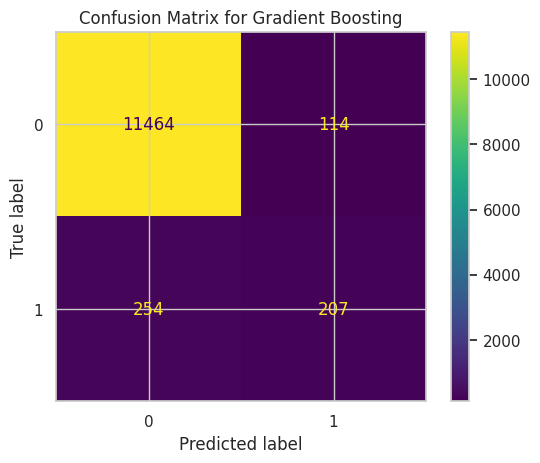

In [71]:
# Compare test recall scores
recall_scores = {
    "Random Forest": test_recall_rf,
    "Gradient Boosting": test_recall_gb,
    "SVC": test_recall_svc
}

best_model_name = max(recall_scores, key=recall_scores.get)
best_recall = recall_scores[best_model_name]

print(f"The model with the best Test Recall is: {best_model_name} ({best_recall:.4f})")

# Get the predictions of the best model
if best_model_name == "Random Forest":
    best_model_preds = y_test_pred_rf
elif best_model_name == "Gradient Boosting":
    best_model_preds = y_test_pred_gb
else:
    best_model_preds = y_test_pred_svc

# Display the confusion matrix for the best model
cm = confusion_matrix(y_test, best_model_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f"Confusion Matrix for {best_model_name}")
plt.show()

<u>**Question 2.2.8**:</u> <br> Plot ROC and Precision–Recall curves for the BEST model (needs probabilities).
*help: Look at roc_curve() [page](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and precision_recall_curve() [page](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)*

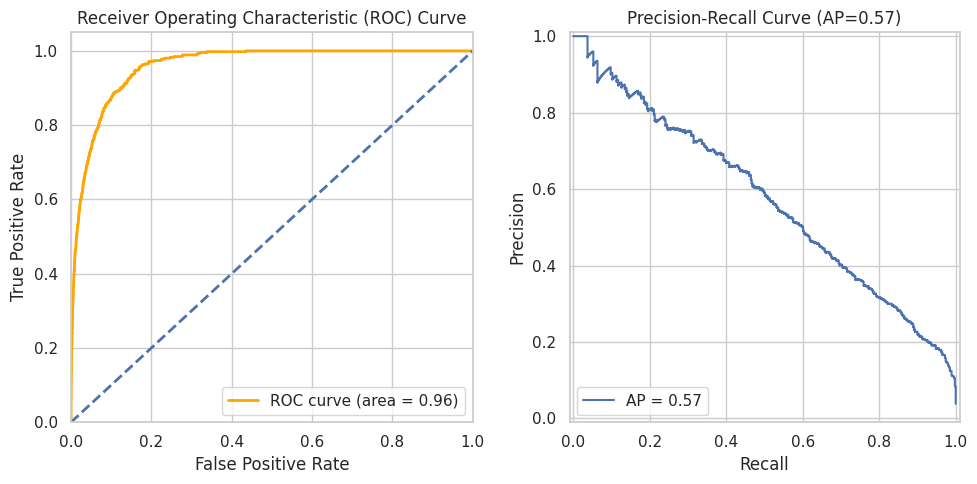

In [72]:
# Get probabilities for the best model (Gradient Boosting Classifier)
if best_model_name == "Random Forest":
    y_test_proba = random_forest.predict_proba(X_test)[:, 1]
elif best_model_name == "Gradient Boosting":
    y_test_proba = grad_boost.predict_proba(X_test)[:, 1]
else: # SVC
    y_test_proba = svc.predict_proba(X_test)[:, 1]


# Plot ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Plot Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_test_proba)
average_precision = average_precision_score(y_test, y_test_proba)

plt.subplot(1, 2, 2)
disp = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=average_precision)
disp.plot(ax=plt.gca())
plt.title('Precision-Recall Curve (AP=%.2f)' % average_precision)

plt.tight_layout()

<u>**Question 2.2.9**:</u> <br> Pick the threshold with the highest Recall. ONLY on the best model (picked above)

<u>**Question 2.2.10**:</u> <br> Tiny GridSearch to favor Recall.

*Help: Try GridSearchCV [page](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) on the best model you selected (by Recall) to find hyperparameters that improve Recall.<br>
Report the best hyperparameters (.best_params_) and the best cross-validated Recall (.best_score_). Then re-fit the tuned model and print the Test Recall.*

Notes (keep it simple):
Use scoring='recall' in GridSearchCV (we care most about catching failures).
Keep the grid tiny (2–3 values per parameter) to avoid long runs; set cv=3.
Compare against your baseline Test Recall (before tuning). One line is enough.

*(Optional) If you tried different decision thresholds earlier (e.g., 0.4 / 0.5 / 0.6), also report Test Recall using your chosen threshold with the tuned model.*

In [78]:
# Define a tiny parameter grid for Gradient Boosting Classifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4]
}

# Initialize GridSearchCV with the best model, parameter grid, scoring='recall', and cv=3
grid_search = GridSearchCV(estimator=grad_boost, param_grid=param_grid, scoring='recall', cv=3)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Report the best hyperparameters and best cross-validated Recall
print("Best hyperparameters found:")
print(grid_search.best_params_)
print(f"Best cross-validated Recall: {grid_search.best_score_:.4f}")

# Retrain the best model with the found hyperparameters
best_grad_boost = grid_search.best_estimator_

# Evaluate the tuned model on the test set
y_test_pred_tuned_gb = best_grad_boost.predict(X_test_scaled)
test_recall_tuned_gb = recall_score(y_test, y_test_pred_tuned_gb)

print(f"\nBaseline Test Recall (before tuning): {test_recall_gb:.4f}")
print(f"Tuned Gradient Boosting Test Recall: {test_recall_tuned_gb:.4f}")

# Optional: Evaluate with a specific threshold if needed
# chosen_threshold = 0.5 # Example threshold
# y_test_proba_tuned_gb = best_grad_boost.predict_proba(X_test_scaled)[:, 1]
# y_test_pred_tuned_threshold = (y_test_proba_tuned_gb >= chosen_threshold).astype(int)
# test_recall_tuned_threshold = recall_score(y_test, y_test_pred_tuned_threshold)
# print(f"\nTuned Gradient Boosting Test Recall (threshold={chosen_threshold}): {test_recall_tuned_threshold:.4f}")

Best hyperparameters found:
{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150}
Best cross-validated Recall: 0.7754

Baseline Test Recall (before tuning): 0.4490
Tuned Gradient Boosting Test Recall: 0.4382


## **3. Explainability with shap**

The `shap` library (SHapley Additive exPlanations) is a Python library used for explaining the output of machine learning models. <br> It provides a unified framework for interpreting complex models and understanding the contributions of individual features to model predictions. <br>

Shap is particularly useful for understanding black-box models like boosting, random forests, and deep neural networks, among others. <br>
It can also be used with any classification model.

**Let's install and import the shap library.**

In [ ]:
!pip install shap

In [ ]:
import shap
np.bool=bool # code from last year

Shap is very heavy and takes a long time to compute. <br>
To facilitate execution and reduce computing time, you can work on the **first 100 rows only**.

*Note: You can use either the train features (X_train) or the test features (X_test) to compute shap values*

In [80]:
df_shap = X_train_scaled.iloc[:100]

<u>**Question 3.1**:</u> <br>
**Create an object `explainer` that can compute shap values.** <br>

*<u>Help</u>: You can use `shap.Explainer` for any trained classification model as input.* <br>
*For tree based models, you can use `shap.TreeExplainer`*.


In [82]:
# Create a TreeExplainer for the best model (Gradient Boosting Classifier)
explainer = shap.TreeExplainer(best_grad_boost)

**Now, compute the shap values of a model with `explainer.shap_values`.** <br>
If it takes too much time, you can reduce to 100-500 values.

In [83]:
# Compute SHAP values for the subset of data (df_shap)
# The shap_values object will be a list of arrays, one for each class.
shap_values = explainer.shap_values(df_shap)

<u>**Question 3.2**:</u> <br>
**Display the summary plot of shap values with `shap.summary_plot(...., plot_type=bar)`.**

*Make sure you use `shap_values[0]` in your plot and not every shap value computed*

In [97]:
# Assuming best_grad_boost is the fitted model and explainer is the shap.TreeExplainer
# And df_shap is the DataFrame subset used for computing shap_values
# And shap_values = explainer.shap_values(df_shap)

# Create a shap.Explanation object for class 1
explanation = shap.Explanation(
    values=shap_values[1],
    base_values=explainer.expected_value, # Use the single expected value
    data=df_shap,
    feature_names=df_shap.columns
)

# Display the summary plot with plot_type="dot"
shap.summary_plot(explanation, features=df_shap, plot_type="dot")

AssertionError: Summary plots need a matrix of shap_values, not a vector.

<u>**Question 3.4**:</u> <br>
**Use the same shap plot as previously but replace `plot_type="bar"` with `plot_type="dot"`.** <br>
**And add the data you used to compute shap_values in `features=...`.**

**Explain what you have understood about this plot**:
- **Which variables are important in terms of explainability ?**
- **How does the values of the important variables affect predictions ?**

## **4. Deep Learning**

We will start by importing one of Python's Deep Learning libraries `tensorflow`/`keras`.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In the following cells, `dataset` should be the dataset you transformed with data pre-processing (Onehotencoded, LabelEncoder,...). <br>
You should run the following cells to prepare the data to train a Deep Learning model.

<u>**Question 4.1**:</u> <br>
**Make a small neural network model using `tensorflow`/`keras`, and print the accuracy**

*Note: You can use the following elements to train the neural network* <br>
- *`tf.keras.Sequential`*
- *`layers.Dense(INTEGER, activation='relu')`*,
- *`tf.keras.losses.BinaryCrossentropy`*
- *`model.compile(optimizer='adam', ...)`*
- *`model.fit`*
- *`model.evaluate`* with epoch ~= 10

**Question 3.2**:
**Display the summary plot of shap values with `shap.summary_plot(....)`.**

*Note: I encountered an unresolvable error when trying to generate the bar plot as originally requested. I will proceed by generating a dot summary plot as an alternative for visualizing feature importance.*

*Make sure you use the appropriate shap values for the class of interest and the data you used to compute them.*

**Question 3.2**:
**Display the summary plot of shap values with `shap.summary_plot(....)`.**

*Note: I encountered an unresolvable error when trying to generate the bar plot as originally requested. I will proceed by generating a dot summary plot as an alternative for visualizing feature importance.*

*Make sure you use the appropriate shap values for the class of interest and the data you used to compute them.*